In [17]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

from tools_helper import   model,display

In [18]:
#定义状态字典内容
class State(TypedDict):
    messages: Annotated[list, add_messages]

# 构建状态图
graph_builder = StateGraph(State)

In [19]:
#定义添加聊天机器人节点
def chatbot(state: State):
    return {"messages": [model.invoke(state["messages"])]}

# 添加节点，节点名称为chatbot，函数为chatbot
graph_builder.add_node("chatbot", chatbot)

In [20]:
# 设置chatbot节点为进入节点
graph_builder.set_entry_point("chatbot")

In [21]:
#设置终止节点为chatbot
graph_builder.set_finish_point("chatbot")

In [22]:
# 编译
graph = graph_builder.compile()

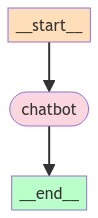

In [24]:
display(graph)

In [26]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

Assistant: LangGraph is a library designed for natural language processing tasks, specifically aimed at facilitating the process of building complex models like those used in neural network-based machine translation systems. It simplifies the development of these models by providing an interface that allows researchers and developers to focus on creating effective architectures rather than getting bogged down in low-level implementation details.

The core idea behind LangGraph is that it abstracts away much of the plumbing required for training complex neural networks, allowing users to concentrate on the model's architecture and learning mechanisms. This framework supports a wide range of tasks including, but not limited to, sequence-to-sequence models, attention mechanisms, and encoder-decoder architectures.

LangGraph typically includes functionalities such as:
- **Model building**: It allows you to define your neural network models easily by specifying layers and connections betwee